In [1]:
pip install albumentations==1.3.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import albumentations as A
import cv2
import os
import numpy as np

# Define the augmentation pipeline
transform = A.Compose([
    A.Rotate(limit=10, p=0.5),  # ±10° tilt for wobbly form.
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),  # Lighting glitches.
    A.HorizontalFlip(p=0.3)  # Subtle mirrors for alignment errors.
])

print("Augmentation pipeline defined!")

Augmentation pipeline defined!


In [4]:
import os

# Check root data folder
data_root = 'data'
if os.path.exists(data_root):
    print(f"Data folder exists. Contents: {os.listdir(data_root)}")
    
    # Check if yoga_poses subfolder exists
    yoga_path = os.path.join(data_root, 'yoga_poses')
    if os.path.exists(yoga_path):
        print(f"yoga_poses exists. Subfolders: {os.listdir(yoga_path)}")
        
        # Check for downward_dog specifically
        dog_path = os.path.join(yoga_path, 'downward_dog')
        if os.path.exists(dog_path):
            jpg_count = len([f for f in os.listdir(dog_path) if f.endswith('.jpg')])
            print(f"downward_dog exists with {jpg_count} JPGs.")
        else:
            print("downward_dog not found—check spelling or subfolders.")
    else:
        print("yoga_poses not found—dataset unzip issue?")
else:
    print("No 'data' folder—run Day 2 download first!")

Data folder exists. Contents: ['augmented', 'YogaPoses']
yoga_poses not found—dataset unzip issue?


In [6]:
import os

yoga_path = 'data/Yoga_poses'  # Updated to match your unzip.
if os.path.exists(yoga_path):
    subfolders = os.listdir(yoga_path)
    print(f"YogaPoses subfolders: {subfolders}")
    
    # Check for downward_dog variants
    possible_poses = ['downward_dog', 'downward-dog', 'DownwardDog', 'downward dog']
    for pose in possible_poses:
        pose_path = os.path.join(yoga_path, pose)
        if os.path.exists(pose_path):
            jpg_count = len([f for f in os.listdir(pose_path) if f.endswith('.jpg')])
            print(f"Found '{pose}' with {jpg_count} JPGs.")
        else:
            print(f"'{pose}' not found.")
else:
    print("YogaPoses not found—double-check unzip.")

YogaPoses subfolders: ['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']
'downward_dog' not found.
'downward-dog' not found.
'DownwardDog' not found.
'downward dog' not found.


In [7]:
import os

yoga_path = 'data/Yoga_poses'
target_pose = 'Downdog'  # Updated to match.
pose_folder = os.path.join(yoga_path, target_pose)
if os.path.exists(pose_folder):
    image_files = [f for f in os.listdir(pose_folder) if f.endswith('.jpg')]
    print(f"Downdog folder exists with {len(image_files)} JPGs. First 3: {image_files[:3]}")
else:
    print("Downdog still missing—double-check Explorer.")

Downdog folder exists with 196 JPGs. First 3: ['00000000.jpg', '00000001.jpg', '00000002.jpg']


In [8]:
dataset_path = 'data/Yoga_poses'  # Updated to match unzip.
augmented_path = 'data/augmented'
target_pose = 'Downdog'  # Updated to exact subfolder name.

# Create augmented subfolder if missing
os.makedirs(os.path.join(augmented_path, f'incorrect_{target_pose}'), exist_ok=True)

pose_folder = os.path.join(dataset_path, target_pose)
image_files = [f for f in os.listdir(pose_folder) if f.endswith('.jpg')]

num_originals = len(image_files)
augmented_count = 0

for img_file in image_files[:50]:  # 50 for quick test.
    img_path = os.path.join(pose_folder, img_file)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i in range(2):  # 2x per image = 100 total.
        augmented = transform(image=image)['image']
        base_name = os.path.splitext(img_file)[0]
        aug_file = f"{base_name}_aug_{i}.jpg"
        save_path = os.path.join(augmented_path, f'incorrect_{target_pose}', aug_file)
        cv2.imwrite(save_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))
        augmented_count += 1
    if augmented_count % 10 == 0:
        print(f"Augmented {augmented_count} so far...")

print(f"Done! Generated {augmented_count} incorrect samples from {num_originals} originals.")

Augmented 10 so far...
Augmented 20 so far...
Augmented 30 so far...
Augmented 40 so far...
Augmented 50 so far...
Augmented 60 so far...
Augmented 70 so far...
Augmented 80 so far...
Augmented 90 so far...
Augmented 100 so far...
Done! Generated 100 incorrect samples from 196 originals.


In [10]:
import pandas as pd  # Line 1: Imports Pandas (pd alias). Handles tables/CSVs as DataFrames.
from sklearn.model_selection import train_test_split  # Line 2: Imports splitter for balanced data division.

# Load existing CSV or start empty if missing  # Line 4: Comment—handles the error.
csv_path = 'data/labels.csv'  # Line 5: Defines the CSV path.
if os.path.exists(csv_path):  # Line 6: os.path.exists checks if file is there (True/False). From import os (add if missing: import os at top).
    labels_df = pd.read_csv(csv_path)  # Line 7: Loads if exists (starter rows).
    print(f"Loaded existing CSV with {len(labels_df)} rows.")  # Line 8: Prints current size for log.
else:
    labels_df = pd.DataFrame(columns=['image_path', 'pose_type', 'is_correct'])  # Line 10: Creates empty DataFrame with column names (like empty Excel). No starter? No problem.
    print("No existing CSV found—starting fresh.")  # Line 11: Log for output.

# Add originals as correct (batch for our 50)  # Line 13: Comment.
originals = []  # Line 14: Empty list for row dicts.
for img_file in image_files[:50]:  # Line 15: Loop over 50 filenames from Cell 2.
    originals.append({  # Line 16: Adds dict (row).
        'image_path': os.path.join(pose_folder, img_file),  # Line 17: Full original path.
        'pose_type': target_pose,  # Line 18: 'Downdog'.
        'is_correct': 1  # Line 19: 1 = correct.
    })
originals_df = pd.DataFrame(originals)  # Line 20: List to DataFrame.
labels_df = pd.concat([labels_df, originals_df], ignore_index=True)  # Line 21: Appends rows; ignore_index resets numbering.

# Add augmented as incorrect  # Line 23: Comment.
augmenteds = []  # Line 24: Empty list for augmented rows.
aug_folder = os.path.join(augmented_path, f'incorrect_{target_pose}')  # Line 25: Augmented folder path.
for img_file in os.listdir(aug_folder):  # Line 26: Lists files in augmented folder.
    if img_file.endswith('.jpg'):  # Line 27: Filter JPGs.
        augmenteds.append({  # Line 28: Adds dict row.
            'image_path': os.path.join(aug_folder, img_file),  # Line 29: Full augmented path.
            'pose_type': target_pose,  # Line 30: 'Downdog'.
            'is_correct': 0  # Line 31: 0 = incorrect.
        })
augmenteds_df = pd.DataFrame(augmenteds)  # Line 32: List to DataFrame.
labels_df = pd.concat([labels_df, augmenteds_df], ignore_index=True)  # Line 33: Appends (now 150 rows).

labels_df.to_csv('data/labels.csv', index=False)  # Line 35: Saves full table to CSV.
print("Updated labels.csv with originals (correct) + augmented (incorrect):")  # Line 36: Header print.
print(labels_df.head())  # Line 37: Shows first 5 rows (table preview).

# Split data into train/val/test  # Line 39: Comment.
train_df, temp_df = train_test_split(labels_df, test_size=0.3, stratify=labels_df['is_correct'], random_state=42)  # Line 40: 70% train, 30% temp (balanced by label).
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['is_correct'], random_state=42)  # Line 41: Temp to 15% val + 15% test.

# Save splits  # Line 43: Comment.
train_df.to_csv('data/train_labels.csv', index=False)  # Line 44: Train CSV.
val_df.to_csv('data/val_labels.csv', index=False)  # Line 45: Val CSV.
test_df.to_csv('data/test_labels.csv', index=False)  # Line 46: Test CSV.

print(f"Splits: Train {len(train_df)}, Val {len(val_df)}, Test {len(test_df)}")  # Line 48: Prints sizes (e.g., Train 105, Val 23, Test 22).

No existing CSV found—starting fresh.
Updated labels.csv with originals (correct) + augmented (incorrect):
                             image_path pose_type is_correct
0  data/Yoga_poses\Downdog\00000000.jpg   Downdog          1
1  data/Yoga_poses\Downdog\00000001.jpg   Downdog          1
2  data/Yoga_poses\Downdog\00000002.jpg   Downdog          1
3  data/Yoga_poses\Downdog\00000003.jpg   Downdog          1
4  data/Yoga_poses\Downdog\00000004.jpg   Downdog          1
Splits: Train 105, Val 22, Test 23


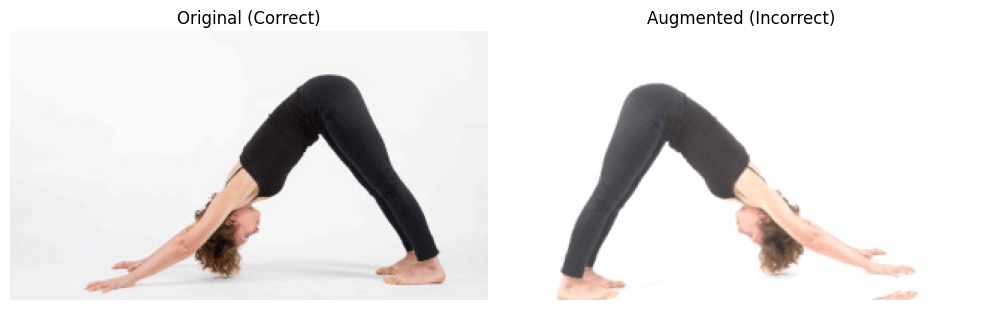

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Sample paths
orig_path = os.path.join(pose_folder, image_files[0])
aug_files = os.listdir(aug_folder)
aug_path = os.path.join(aug_folder, aug_files[0])

orig_img = cv2.imread(orig_path)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

aug_img = cv2.imread(aug_path)
aug_img = cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(orig_img)
axes[0].set_title('Original (Correct)')
axes[0].axis('off')

axes[1].imshow(aug_img)
axes[1].set_title('Augmented (Incorrect)')
axes[1].axis('off')

plt.tight_layout()
plt.show()